In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from src.clean_utils import spaces, mayus
%matplotlib inline

ModuleNotFoundError: No module named 'src'

In [135]:
df = pd.read_csv("/Users/trivino/desktop/Analysis/W2-Project-Pandas/data/attacks.csv")

## 01. Discovering the data set

In [136]:
df.info() #With this simple function we observe the different columns of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [137]:

df.head() #Here we have the first elements of the database we are going to work with. Looks very interesting =)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [138]:
# We sum the quantities of nulls on each column.
df.isnull().sum().sort_values


<bound method Series.sort_values of Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64>

In [139]:
df.shape # The size of our database. Nothing we can't analyze!


(25723, 24)

In [140]:
df.describe() # For obtein basic stadistic information.

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [141]:
# Let's see if any row has ALL null values
df.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

## 02. Data cleaning

**What is NaN?**

NaN means "Not a Number" representing the missing values in Pandas

Below I delete all cells in a row containing a minimum of 21 NaN values, the maximum value would be 24 which is our number of columns.

In [142]:
df.dropna(thresh=df.shape[1]-21, axis=0,inplace=True) 

- We eliminate the columns that are completely filled with NaN

- By means of the "how" parameter we can control how we want the method to be applied: if it takes the value "all", only rows or columns in which all their elements are null will be deleted.

In [143]:
df.dropna(how = "all")

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


- We eliminate the two "Unnamed" columns that we cannot obtain information on what they contain.

In [144]:
df.drop(["Unnamed: 22", 'Unnamed: 23'], axis = 'columns', inplace=True)

In [145]:
df.shape


(6302, 22)

- We remove the space from the column names with the str.rstrip() function

In [146]:
df.columns = df.columns.str.rstrip() #This will ensure fewer problems later on.

In [147]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

## 03. Hypothesis: 

### What is the activity with the highest risk of shark attacks?

Throughout our analysis we will be answering questions that will converge to answer our hypothesis.

 

- How many types of situations have suffered shark attacks?

In [148]:
df["Activity"].value_counts()

Surfing                                     971
Swimming                                    869
Fishing                                     431
Spearfishing                                333
Bathing                                     162
                                           ... 
Fishing, lifting shark out of craypot         1
Conducting research                           1
Fell overboard from USS Ward                  1
Ship Mariston torpedoed & sunk                1
Free diving / Photographing pilot whales      1
Name: Activity, Length: 1532, dtype: int64

We noticed that there are some small data that are not well collected due to errors in the data input, so we are going to create a small function that will help us to have more reliable data.

1) we are going to eliminate the blank spaces in the column

2) we will allow only valid values Y, N, and UNKNOWN in uppercase letters 

In [215]:
df["Fatal (Y/N)"].value_counts()

N          4293
Y          1387
UNKNOWN      71
 N            7
2017          1
N             1
y             1
M             1
Name: Fatal (Y/N), dtype: int64

In [216]:
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].apply(spaces) # We eliminate the spaces.


NameError: name 'spaces' is not defined

In [217]:
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].apply(mayus) # e convert the cells to uppercase


NameError: name 'mayus' is not defined

In [218]:
df = df.drop(df[df['Fatal (Y/N)']== "NAN"].index) 


In [219]:
df["Fatal (Y/N)"].value_counts()

N          4293
Y          1387
UNKNOWN      71
 N            7
2017          1
N             1
y             1
M             1
Name: Fatal (Y/N), dtype: int64

In [154]:
df.loc[df["Fatal (Y/N)"] == "2017","Fatal (Y/N)"] #We are looking for the 2017 value to ensure whether it is fatal or not

786    2017
Name: Fatal (Y/N), dtype: object

In [93]:
df.iloc[786]

Case Number                                                      2012.06.10
Date                                                            10-Jun-2012
Year                                                                 2012.0
Type                                                               Provoked
Country                                                               ITALY
Area                                                               Sardinia
Location                                                           Muravera
Activity                    Attempting to rescue an injured & beached shark
Name                                                           Giorgio Zara
Sex                                                                       M
Age                                                                      57
Injury                             Lower left leg injured PROVOKED ACCIDENT
Fatal (Y/N)                                                            2017
Time        

In [94]:
#by the name of the victim we perform a google search and verify that it has not been a fatal attack
#We can modify the cell with 100% security.
#http://sharkattacksurvivors.com/shark_attack/viewtopic.php?t=1615

In [95]:
df["Fatal (Y/N)"].replace("2017","N", inplace=True)


In [96]:
df["Fatal (Y/N)"].value_counts()


N          4294
Y          1388
UNKNOWN      71
 N            7
N             1
y             1
M             1
Name: Fatal (Y/N), dtype: int64

In [97]:
type(df["Fatal (Y/N)"])

pandas.core.series.Series

In [98]:
df["Fatal (Y/N)"].value_counts()

N          4294
Y          1388
UNKNOWN      71
 N            7
N             1
y             1
M             1
Name: Fatal (Y/N), dtype: int64

In [99]:
df.loc[df["Fatal (Y/N)"] == "M"]1

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
285,2016.04.18.b,18-Apr-2016,2016.0,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,...,M,Morning,"Grey reef shark, 2 m","TNTV News, 4/19/2016",2016.04.18.b-Iotua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.18.b,2016.04.18.b,6018.0


In [211]:
Letal = df["Fatal (Y/N)"]

In [100]:
df.loc[285] 

Case Number                                                    2016.04.18.b
Date                                                            18-Apr-2016
Year                                                                 2016.0
Type                                                               Provoked
Country                                                    FRENCH POLYNESIA
Area                                                               Tuamotos
Location                                                       Makemo Atoll
Activity                                                       Spearfishing
Name                                                            Hoata Iotua
Sex                                                                       M
Age                                                                      22
Injury                    Laceration to knee by speared shark PROVOKED I...
Fatal (Y/N)                                                               M
Time        

In [101]:
# We have sought information about this accident and verified that it was not fatal.
# http://www.goshark.co.za/1/French%20Polynesia/all/all
# We can modify the data set and obtain the highest possible data reliability. 

- Below we start with the visualization section, we will begin by showing which are the most dangerous activities and the 10 countries with the most shark attacks registered in our database.

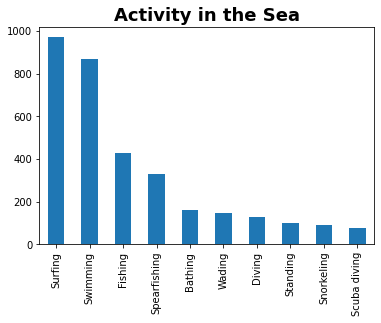

In [249]:
fig1 = plt.figure()
df["Activity"].value_counts().nlargest(10).plot.bar()
plt.title("Activity in the Sea", fontweight= "bold",fontsize=18)
fig2.savefig('Activity in the Sea')

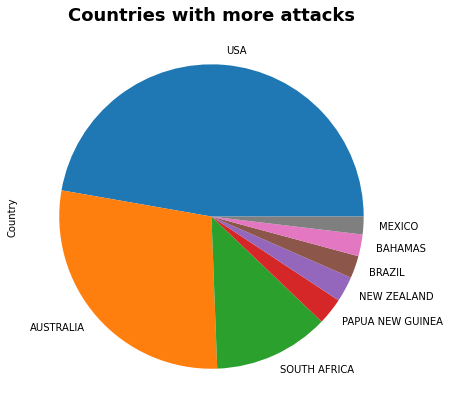

In [156]:
fig2 = plt.figure()
df["Country"].value_counts().nlargest(8).plot.pie(figsize = (7,7))
plt.title("Countries with more attacks", fontweight= "bold",fontsize=18)
fig1.savefig('Countries Attacks.jpg')



In [157]:
df_surf = df[df["Activity"] == "Surfing"] #933 people who were surfing

In [158]:
df_surf = df["Activity"] == "Surfing"

In [159]:
df[df["Type"] == "Provoked"] # 572 cases were provoked.

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0
14,2018.05.00,May 2018,2018.0,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,Melisa Brunning,F,...,N,NaN,"Tawny nurse shark, 2m","Perth Now, 6/30/2018",2018.05.00-Brunning.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.00,2018.05.00,6289.0
41,2018.02.17,18-Feb-2018,2018.0,Provoked,AUSTRALIA,Victoria,Westernport Bay,Kayak fishing for sharks,Brett Palmer,M,...,N,Night,NaN,"B. Myatt, GSAF",2018.02.17-Palmer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.02.17,2018.02.17,6262.0
55,2017.12.21,21-Dec-2017,2017.0,Provoked,MALAYSIA,Sepang,Bagan Lalang Beach,Fishing / Wading,Sairol Harun,M,...,N,NaN,Juvenile nurse shark,TrackingSharks.com,2017.12.21-Harun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.12.21,2017.12.21,6248.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6224,ND.0089,"No date, Before Aug-1987",0.0,Provoked,VANUATU,Malampa Province,"Hokai, Malakula",Attempting to drive shark from area,a chief,M,...,N,NaN,A large hammerhead shark,S. Combs,ND-0089-VanuatuChief.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0089,ND.0089,79.0
6226,ND.0087,"No date, Before 1975",0.0,Provoked,USA,Florida,"Riviera Beach, Palm Beach County",Skin diving. Grabbed shark's tail; shark turne...,Carl Bruster,M,...,N,NaN,"Nurse shark, 2.1 m [7']","R. Skocik, p.176",ND-0087-Carl-Bruster.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0087,ND.0087,77.0
6250,ND.0055,Before 1958,0.0,Provoked,BAHAMAS,Andros Islands,Middle Bight,Testing movie camera in full diving dress,John Fenton,M,...,N,NaN,"Nurse shark, 2.1 m [7']","V.M. Coppleson (1958), p.97",ND-0055-JohnFenton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0055,ND.0055,53.0
6254,ND.0051,Before 1957,0.0,Provoked,CUBA,Havana Province,Cojimar,"Shark fishing, knocked overboard",Sandrillio,M,...,Y,NaN,NaN,"F. Poli, pp.75, 81-83",ND-0051-Sandrillio.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0051,ND.0051,49.0


In [160]:
df_provoked = df["Type"] == "Provoked"

In [161]:
df_unprovoked = df["Type"] == "Unprovoked"

<AxesSubplot:xlabel='Type', ylabel='count'>

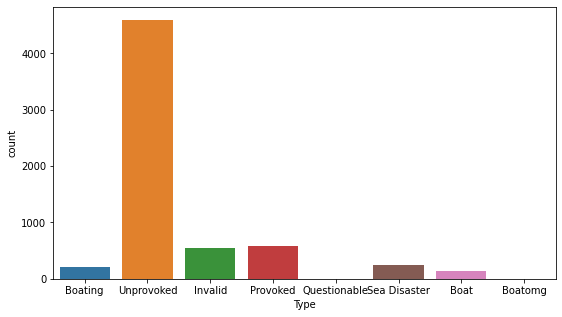

In [162]:
fig3, ax1 = plt.subplots(figsize = (9, 5))

sns.countplot(data = df, x = "Type")


<AxesSubplot:xlabel='Activity', ylabel='count'>

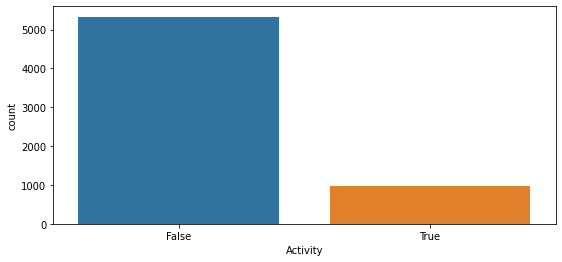

In [163]:
fig4, ax2 = plt.subplots(figsize = (9, 4))

sns.countplot(x = df_surf )

# Those who were surfing with respect to the other activities


Text(0.5, 1.0, 'provoked vs unprovoked')

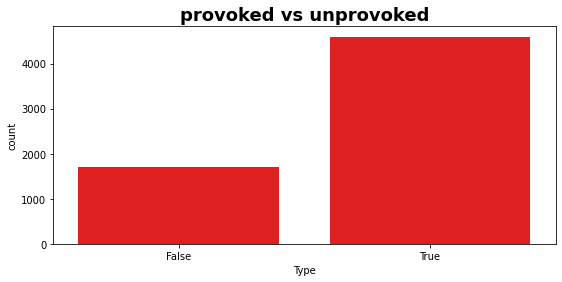

In [255]:
fig4, ax2 = plt.subplots(figsize = (9, 4))

sns.countplot(x = df_unprovoked, color = "Red")
fig7.savefig("provoked_vs_unprovoked.jpg")
plt.title("provoked vs unprovoked", fontweight= "bold",fontsize=18)

# We can see that the majority of cases were not provoked, but almost half of them were provoked

Text(0.5, 0, 'Provoked                       Unprovoked')

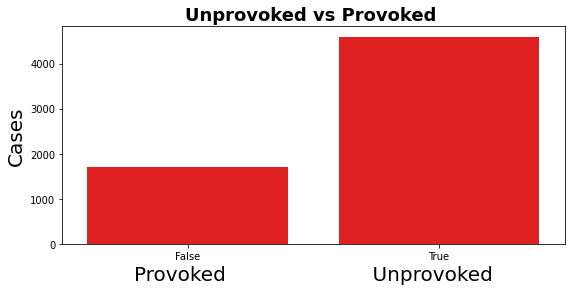

In [268]:
fig4, ax2 = plt.subplots(figsize = (9, 4))

sns.countplot(x = df_unprovoked, color = "Red")
fig7.savefig("provoked_vs_unprovoked.jpg")
plt.title("Unprovoked vs Provoked ", fontweight= "bold",fontsize=18)
ax2.set_ylabel('Cases', fontsize=20) # Titulo eje y
ax2.set_xlabel("Provoked                       Unprovoked", fontsize=20) # Titulo eje x

In [165]:
surf_4ever = df.groupby(["Activity"]).get_group("Surfing")


In [166]:
#surf_4ever & df[df["Type"] == "Provoked"]

In [113]:
(df["Year"]).value_counts()

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1767.0      1
1816.0      1
1812.0      1
1822.0      1
1748.0      1
Name: Year, Length: 249, dtype: int64

In [114]:
df["Fatal (Y/N)"].replace(0.0,"", inplace=True)

- In the graph below, we see that there has not been an increase in attacks over the years, there are less than 145 cases per year by sharks.
- We note that there is a large index in year 0, so we will remove these values from the graph.
and convert the years to whole numbers instead of decimals.

<AxesSubplot:>

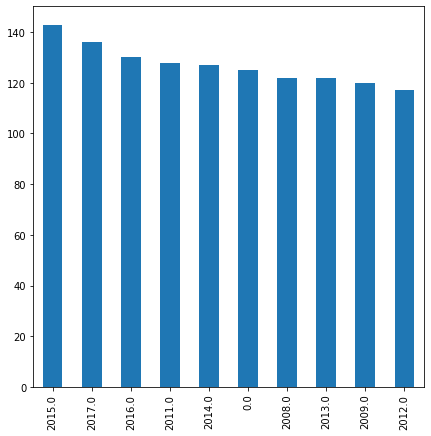

In [115]:
df["Year"].value_counts().nlargest(10).plot.bar(figsize = (7,7))


In [188]:
df['Años'] = pd.cut(df.Year, bins = [1950,1955,1960,1965,1970,1975, 1980,1985,1990,1995, 2000,2005,2010,2015, 2020])


In [189]:
df["Años"].unique()

[(2015, 2020], (2010, 2015], (2005, 2010], (2000, 2005], (1995, 2000], ..., (1970.0, 1975.0], (1960.0, 1965.0], (1955.0, 1960.0], (1950.0, 1955.0], NaN]
Length: 15
Categories (14, interval[int64]): [(1950, 1955] < (1955, 1960] < (1960, 1965] < (1965, 1970] ... (2000, 2005] < (2005, 2010] < (2010, 2015] < (2015, 2020]]

In [190]:
df["Year"].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894.,
       1893., 1892.,

In [191]:
#df["Year"]= df.drop(df[df["Year"] == 0.].index,inplace=True)


In [192]:
df["Year"].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894.,
       1893., 1892.,

In [193]:
df["Year"].apply(spaces)

NameError: name 'spaces' is not defined

In [194]:
df["Year"].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894.,
       1893., 1892.,

In [195]:
df.dropna(subset=["Year"],inplace=True) #

In [196]:
df["Year"].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894.,
       1893., 1892.,

In [197]:
def change_int (x):
    x = int(x)
    return x


In [198]:
df.drop(df[df['Year']== 0.0].index)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Años
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,"(2015.0, 2020.0]"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,"(2015.0, 2020.0]"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,"(2015.0, 2020.0]"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,"(2015.0, 2020.0]"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,"(2015.0, 2020.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6172,1554.00.00,Ca. 1554,1554.0,Unprovoked,FRANCE,Nice & Marseilles,NaN,NaN,males (wearing armor),M,...,NaN,Possibly white sharks,G. Rondelet,1554.00.00-Rondelet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1554.00.00,1554.00.00,131.0,NaN
6173,1543.00.00,Ca. 1543,1543.0,Unprovoked,VENEZUELA,Magarita or Cubagua Islands,NaN,Pearl diving,Indian slave,M,...,NaN,NaN,J. Castro,1543.00.00.R-LasCasas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1543.00.00,1543.00.00,130.0,NaN
6174,0500.00.00,Circa 500 A.D.,500.0,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,...,NaN,NaN,J. Castro,500AD-Mexico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0500.00.00,0500.00.00,129.0,NaN
6175,0077.00.00,77 A.D.,77.0,Unprovoked,NaN,Ionian Sea,NaN,Sponge diving,males,M,...,NaN,NaN,Perils mentioned by Pliny the Elder (23 A.D. t...,77AD-Pliny.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0077.00.00,0077.00.00,128.0,NaN


In [199]:
#df["Fatal (Y/N)"].apply(change_int)

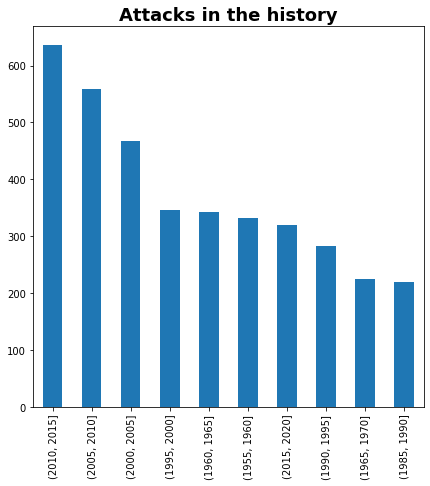

In [206]:
fig6 = plt.figure()
df["Años"].value_counts().nlargest(10).plot.bar(figsize = (7,7))
plt.title("Attacks in the history", fontweight= "bold",fontsize=18)
fig1.savefig('Attacks for years.jpg')

Text(0.5, 1.0, 'Fatality')

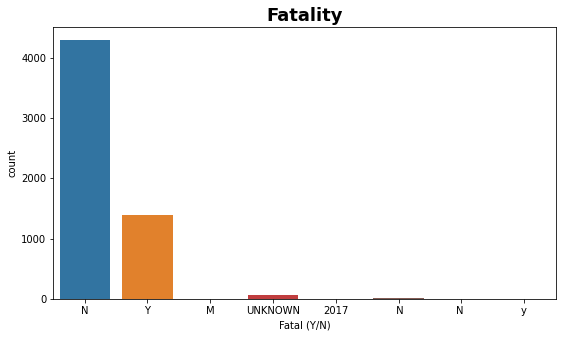

In [223]:
Letal

fig7, ax4 = plt.subplots(figsize = (9, 5))
sns.countplot(x = Letal )
plt.title("Fatality", fontweight= "bold",fontsize=18)


